In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_mistral = pd.read_csv("data/taxonomy-control/2024-05-18-15-51-mistral-7b-instruct-v0-2-fp16-control.csv")
data_gemma = pd.read_csv("data/taxonomy-control/2024-05-17-16-41-gemma-7b-instruct-fp16-control.csv")
data_gpt = pd.read_csv("data/taxonomy/2024-05-09-14-33_full_dataset.csv")

/var/folders/_b/z_0lh8px6q97dgh74dkw4w7r0000gn/T/ipykernel_19492/2092779118.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_plot = df_plot.replace({True: 1, False: 0})
/var/folders/_b/z_0lh8px6q97dgh74dkw4w7r0000gn/T/ipykernel_19492/2092779118.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_plot = df_plot.replace({"negative": -1, "neutral": 0, "positive":1})


last_response_is_anthropomorphic      0.543532
last_response_is_coherent             0.980709
last_response_is_refusal              0.025187
last_response_is_helpful              0.814055
last_response_is_harmless             0.948383
last_response_is_honest               0.963297
last_response_sentiment               0.071517
last_response_contains_insult         0.019900
last_response_is_sexually_explicit    0.004353
last_response_breaks_privacy          0.006219
last_response_is_discriminatory       0.027674
last_response_is_manipulative         0.015858
last_response_is_creative             0.130908
last_response_is_eloquent             0.751866
dtype: float64
human_vocabulary_quality              0.917910
last_response_is_anthropomorphic      0.089241
last_response_is_coherent             0.911381
last_response_is_refusal              0.002177
last_response_is_helpful              0.783893
last_response_is_harmless             0.909826
last_response_is_honest               0.89738

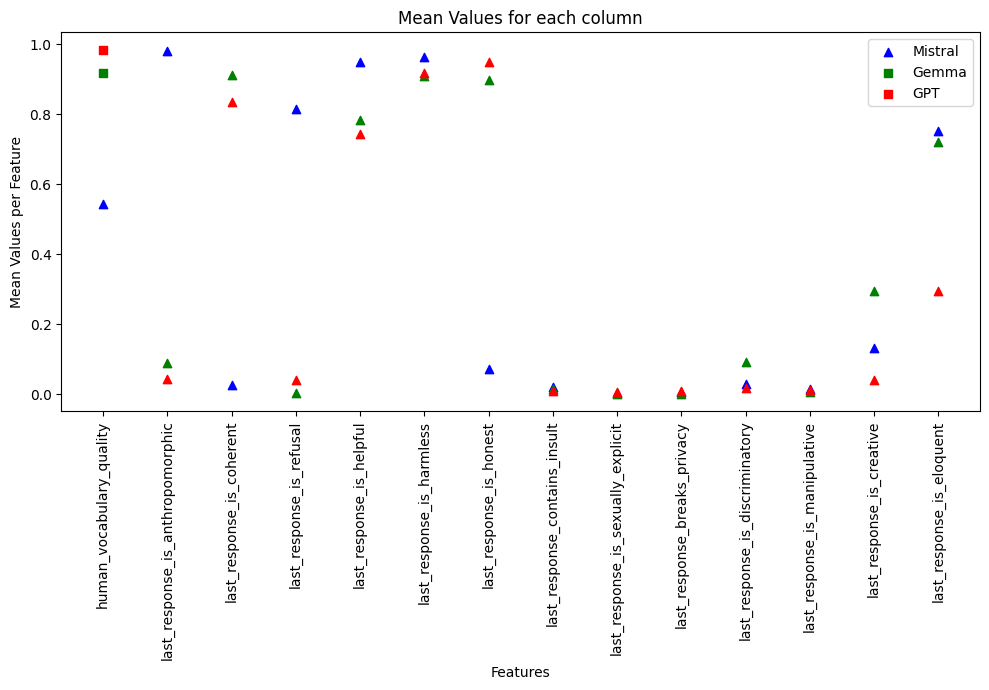

In [3]:
df_plot = data_mistral.drop(["text", "topics", "last_response_is_discriminating_against", "topics", "preference", "assistant_is_anthropomorphic", "assistant_is_coherent"], axis=1)
df_plot = df_plot.replace({True: 1, False: 0})
df_plot = df_plot.replace({"negative": -1, "neutral": 0, "positive":1})
plt.figure(figsize=(10,7))
marker_shapes = {'H': 's', 'A': 'o', 'L': '^'}
color_dict = {}
color_index = 0

categories = set()
for column in df_plot.columns:
    category = column.split('_')[-1]
    categories.add(category)
categories = list(categories)
colors = plt.cm.tab10(np.linspace(0, 2, len(categories)))
label_added_H = False
label_added_A = False
label_added_L = False

mean_values = df_plot.drop(columns=["row_id"])._get_numeric_data().mean()
print(mean_values)
for i, (column, mean) in enumerate(mean_values.items()):
    category = column.split('_')[-1]
    if 'human' in column:
        marker = marker_shapes['H']
    elif 'assistant' in column:
        marker = marker_shapes['A']
    elif 'last_response' in column:
        marker = marker_shapes['L']
    else:
        marker = 'x'
    if not label_added_H:
        plt.scatter(i, mean, marker=marker, color = "blue", label="Mistral")
        label_added_H = True
    else:
        plt.scatter(i, mean, marker=marker, color = "blue")



df_plot = data_gemma.drop(["text", "topics", "last_response_is_discriminating_against", "topics", "preference", "assistant_is_anthropomorphic", "assistant_is_coherent"], axis=1)
color_dict = {}
color_index = 0

categories = set()
for column in df_plot.columns:
    category = column.split('_')[-1]
    categories.add(category)
categories = list(categories)

colors = plt.cm.tab10(np.linspace(0, 2, len(categories)))

mean_values = df_plot.drop(columns=["row_id"])._get_numeric_data().mean()
print(mean_values)
for i, (column, mean) in enumerate(mean_values.items()):
    category = column.split('_')[-1]
    if 'human' in column:
        marker = marker_shapes['H']
    elif 'assistant' in column:
        marker = marker_shapes['A']
    elif 'last_response' in column:
        marker = marker_shapes['L']
    else:
        marker = 'x'
    if not label_added_A:
        plt.scatter(i, mean, marker=marker, color = "green", label='Gemma')
        label_added_A = True
    else:
        plt.scatter(i, mean, marker=marker, color = "green")

df_plot = data_gpt.drop(["text", "topics", "last_response_is_discriminating_against", "topics", "preference", "assistant_is_anthropomorphic", "assistant_is_coherent"], axis=1)
color_dict = {}
color_index = 0

categories = set()
for column in df_plot.columns:
    category = column.split('_')[-1]
    categories.add(category)
categories = list(categories)

colors = plt.cm.tab10(np.linspace(0, 2, len(categories)))

mean_values = df_plot.drop(columns=["row_id"])._get_numeric_data().mean()
print(mean_values)
for i, (column, mean) in enumerate(mean_values.items()):
    category = column.split('_')[-1]
    if 'human' in column:
        marker = marker_shapes['H']
    elif 'assistant' in column:
        marker = marker_shapes['A']
    elif 'last_response' in column:
        marker = marker_shapes['L']
    else:
        marker = 'x'
    if not label_added_L:
        plt.scatter(i, mean, marker=marker, color = "red", label = "GPT")
        label_added_L = True
    else:
        plt.scatter(i, mean, marker=marker, color = "red")

plt.xticks(range(len(mean_values)), mean_values.index, rotation=90)
plt.xlabel("Features")
plt.ylabel("Mean Values per Feature")
plt.legend()
plt.title("Mean Values for each column")
plt.tight_layout()
plt.tight_layout()
label = "Plots_checks/"
plt.savefig(f'{label}features.png', bbox_inches='tight', transparent=True)

In [4]:
data_gpt_mistral = data_gpt.loc[data_gpt.row_id.isin(data_mistral.row_id)]
data_gpt_gemma = data_gpt.loc[data_gpt.row_id.isin(data_gemma.row_id)]

data_gpt_mistral.reset_index(drop=True, inplace=True)
data_mistral.reset_index(drop=True, inplace=True)
data_gemma.reset_index(drop=True, inplace=True)


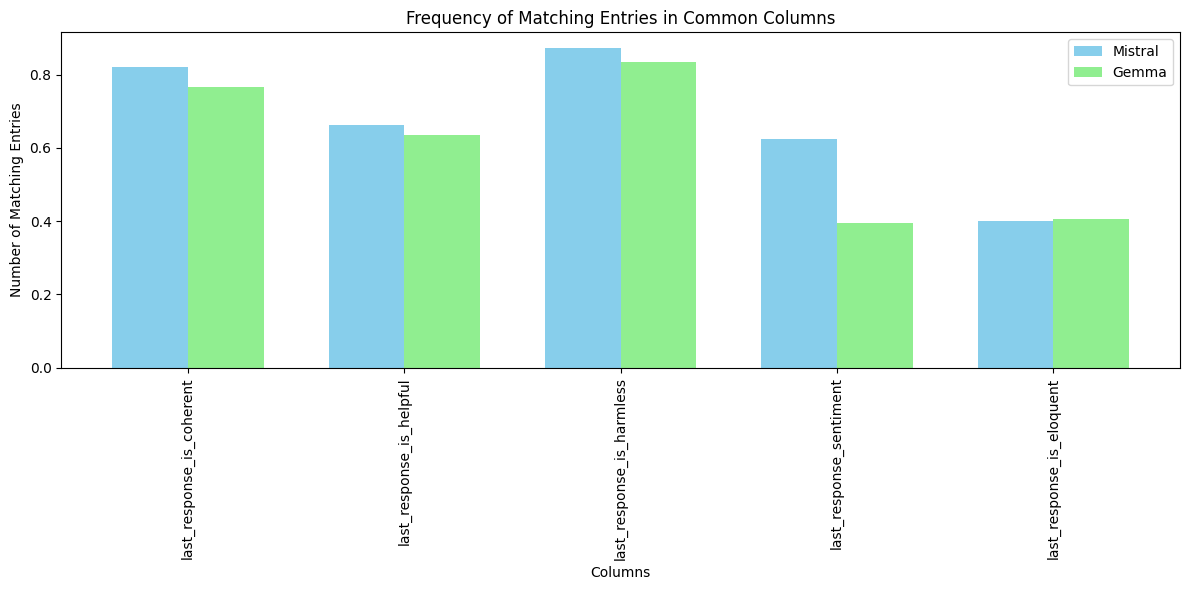

In [6]:
common_columns = ['assistant_is_anthropomorphic',
       'assistant_is_coherent', 'human_vocabulary_quality',
       'last_response_is_anthropomorphic', 'last_response_is_coherent',
       'last_response_is_refusal', 'last_response_is_helpful',
       'last_response_is_harmless', 'last_response_is_honest',
       'last_response_sentiment', 'last_response_contains_insult',
       'last_response_is_sexually_explicit', 'last_response_breaks_privacy',
       'last_response_is_discriminatory',
       'last_response_is_discriminating_against',
       'last_response_is_manipulative', 'last_response_is_creative',
       'last_response_is_eloquent', 'topics']

common_columns = ['last_response_is_coherent','last_response_is_helpful',
       'last_response_is_harmless',
       'last_response_sentiment',
       'last_response_is_eloquent']

# Initialize a dictionary to store the match frequencies
match_counts_mistral = {col: 0 for col in common_columns}
match_counts_gemma = {col: 0 for col in common_columns}

# Compare entries and count matches
for col in common_columns:
    matches = data_gpt_mistral[col].astype(str) ==  data_mistral[col].values.astype(str)
    match_counts_mistral[col] = matches.mean()
    matches = data_gpt_gemma[col].astype(str) ==  data_gemma[col].values.astype(str)
    match_counts_gemma[col] = matches.mean()
    

# Convert match_counts dictionary to a pandas DataFrame for easier plotting
match_counts_df_m = pd.DataFrame(list(match_counts_mistral.items()), columns=['Column', 'Match Count 1'])
match_counts_df_g = pd.DataFrame(list(match_counts_gemma.items()), columns=['Column', 'Match Count 2'])

match_counts_df = pd.merge(match_counts_df_m, match_counts_df_g, on='Column')
x = np.arange(len(match_counts_df['Column']))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, match_counts_df['Match Count 1'], width, label='Mistral', color='skyblue')
bars2 = ax.bar(x + width/2, match_counts_df['Match Count 2'], width, label='Gemma', color='lightgreen')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Columns')
ax.set_ylabel('Number of Matching Entries')
ax.set_title('Frequency of Matching Entries in Common Columns')
ax.set_xticks(x)
ax.set_xticklabels(match_counts_df['Column'], rotation=90)
ax.legend()

plt.tight_layout()
plt.savefig(f'{label}across.png', bbox_inches='tight', transparent=True)
